In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from Models.TT_WOPT import TT_WOPT_Model
from metrics import RSE
from Utils import mask_img

img shape:  (200, 200, 3)


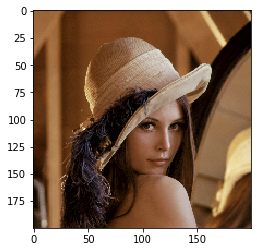

In [3]:
# Read lena image

img = cv2.imread('../data/lena.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (200, 200))
plt.imshow(img)
print("img shape: ", img.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


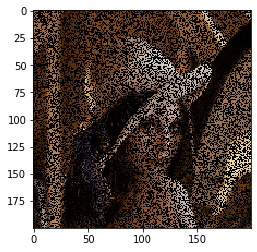

In [4]:
# Mask image

img_missing = mask_img(img)
plt.imshow(img_missing.astype(int))

In [7]:
# Create and train using gradient descent

model = TT_WOPT_Model(img_missing, (1, 14, 14, 1), 1e-6)
model.train(10000)

Epoch: 0, Loss: 4978.346101220165
Epoch: 1, Loss: 4903.571181506643
Epoch: 2, Loss: 4868.918523541848
Epoch: 3, Loss: 4851.875602569884
Epoch: 4, Loss: 4842.956710180465
Epoch: 5, Loss: 4837.841875150762
Epoch: 6, Loss: 4834.4699299421745
Epoch: 7, Loss: 4831.818544081954
Epoch: 8, Loss: 4829.353850984436
Epoch: 9, Loss: 4826.770552321085
Epoch: 10, Loss: 4823.864271911766
Epoch: 11, Loss: 4820.465240156298
Epoch: 12, Loss: 4816.399828853723
Epoch: 13, Loss: 4811.463155019869
Epoch: 14, Loss: 4805.393323561676
Epoch: 15, Loss: 4797.840624689255
Epoch: 16, Loss: 4788.325064227633
Epoch: 17, Loss: 4776.173510388114
Epoch: 18, Loss: 4760.423104922281
Epoch: 19, Loss: 4739.669139704582
Epoch: 20, Loss: 4711.820946458144
Epoch: 21, Loss: 4673.704747991835
Epoch: 22, Loss: 4620.413752242477
Epoch: 23, Loss: 4544.255410806812
Epoch: 24, Loss: 4433.122792109628
Epoch: 25, Loss: 4268.307294687891
Epoch: 26, Loss: 4022.835548661396
Epoch: 27, Loss: 3665.080163035675
Epoch: 28, Loss: 3180.0083291

Epoch: 229, Loss: 210.52182474122247
Epoch: 230, Loss: 210.04766597913505
Epoch: 231, Loss: 209.57792658153275
Epoch: 232, Loss: 209.11249863914549
Epoch: 233, Loss: 208.65127692881225
Epoch: 234, Loss: 208.19415888481936
Epoch: 235, Loss: 207.7410445676446
Epoch: 236, Loss: 207.29183663042286
Epoch: 237, Loss: 206.84644028330743
Epoch: 238, Loss: 206.40476325599352
Epoch: 239, Loss: 205.9667157586803
Epoch: 240, Loss: 205.53221044154367
Epoch: 241, Loss: 205.10116235307854
Epoch: 242, Loss: 204.67348889735342
Epoch: 243, Loss: 204.2491097904384
Epoch: 244, Loss: 203.82794701610308
Epoch: 245, Loss: 203.40992478099167
Epoch: 246, Loss: 202.99496946933866
Epoch: 247, Loss: 202.58300959741374
Epoch: 248, Loss: 202.17397576775153
Epoch: 249, Loss: 201.7678006233394
Epoch: 250, Loss: 201.36441880177557
Epoch: 251, Loss: 200.96376688956917
Epoch: 252, Loss: 200.5657833765636
Epoch: 253, Loss: 200.1704086106827
Epoch: 254, Loss: 199.77758475290935
Epoch: 255, Loss: 199.38725573272208
Epoch: 

Epoch: 454, Loss: 145.97689117352664
Epoch: 455, Loss: 145.78722154464225
Epoch: 456, Loss: 145.59814302088122
Epoch: 457, Loss: 145.40965401968657
Epoch: 458, Loss: 145.2217529838542
Epoch: 459, Loss: 145.03443838142155
Epoch: 460, Loss: 144.84770870555738
Epoch: 461, Loss: 144.6615624744574
Epoch: 462, Loss: 144.47599823119938
Epoch: 463, Loss: 144.29101454360088
Epoch: 464, Loss: 144.10661000408032
Epoch: 465, Loss: 143.92278322948417
Epoch: 466, Loss: 143.7395328609069
Epoch: 467, Loss: 143.5568575635165
Epoch: 468, Loss: 143.37475602634848
Epoch: 469, Loss: 143.1932269621114
Epoch: 470, Loss: 143.01226910695434
Epoch: 471, Loss: 142.83188122026522
Epoch: 472, Loss: 142.65206208440065
Epoch: 473, Loss: 142.4728105044822
Epoch: 474, Loss: 142.29412530810038
Epoch: 475, Loss: 142.11600534508824
Epoch: 476, Loss: 141.93844948722025
Epoch: 477, Loss: 141.76145662795307
Epoch: 478, Loss: 141.58502568211654
Epoch: 479, Loss: 141.40915558563472
Epoch: 480, Loss: 141.23384529521167
Epoch: 

Epoch: 677, Loss: 116.71048366580506
Epoch: 678, Loss: 116.63126746219199
Epoch: 679, Loss: 116.55242993640701
Epoch: 680, Loss: 116.47396962224046
Epoch: 681, Loss: 116.3958850515912
Epoch: 682, Loss: 116.3181747545888
Epoch: 683, Loss: 116.24083725967209
Epoch: 684, Loss: 116.16387109372118
Epoch: 685, Loss: 116.08727478213112
Epoch: 686, Loss: 116.01104684894284
Epoch: 687, Loss: 115.93518581690292
Epoch: 688, Loss: 115.85969020760854
Epoch: 689, Loss: 115.78455854156316
Epoch: 690, Loss: 115.7097893383056
Epoch: 691, Loss: 115.63538111649652
Epoch: 692, Loss: 115.5613323939989
Epoch: 693, Loss: 115.48764168800513
Epoch: 694, Loss: 115.41430751509667
Epoch: 695, Loss: 115.34132839137514
Epoch: 696, Loss: 115.26870283251802
Epoch: 697, Loss: 115.19642935389678
Epoch: 698, Loss: 115.12450647065342
Epoch: 699, Loss: 115.05293269780775
Epoch: 700, Loss: 114.98170655032695
Epoch: 701, Loss: 114.9108265432318
Epoch: 702, Loss: 114.84029119166235
Epoch: 703, Loss: 114.77009901100595
Epoch:

Epoch: 900, Loss: 105.88583339407643
Epoch: 901, Loss: 105.85829313836992
Epoch: 902, Loss: 105.83086965984702
Epoch: 903, Loss: 105.803562277474
Epoch: 904, Loss: 105.7763703143537
Epoch: 905, Loss: 105.74929309771657
Epoch: 906, Loss: 105.72232995891272
Epoch: 907, Loss: 105.6954802333663
Epoch: 908, Loss: 105.66874326058229
Epoch: 909, Loss: 105.64211838411987
Epoch: 910, Loss: 105.61560495156446
Epoch: 911, Loss: 105.5892023145169
Epoch: 912, Loss: 105.56290982857942
Epoch: 913, Loss: 105.53672685332496
Epoch: 914, Loss: 105.51065275227825
Epoch: 915, Loss: 105.48468689291974
Epoch: 916, Loss: 105.45882864663105
Epoch: 917, Loss: 105.43307738870183
Epoch: 918, Loss: 105.40743249830604
Epoch: 919, Loss: 105.38189335846901
Epoch: 920, Loss: 105.3564593560646
Epoch: 921, Loss: 105.33112988179226
Epoch: 922, Loss: 105.3059043301483
Epoch: 923, Loss: 105.28078209941984
Epoch: 924, Loss: 105.25576259165506
Epoch: 925, Loss: 105.23084521264732
Epoch: 926, Loss: 105.2060293719252
Epoch: 92

Epoch: 1119, Loss: 101.77863457661469
Epoch: 1120, Loss: 101.76587664292653
Epoch: 1121, Loss: 101.75315491214891
Epoch: 1122, Loss: 101.7404692162623
Epoch: 1123, Loss: 101.72781938827436
Epoch: 1124, Loss: 101.71520526222189
Epoch: 1125, Loss: 101.70262667315006
Epoch: 1126, Loss: 101.69008345711728
Epoch: 1127, Loss: 101.6775754511853
Epoch: 1128, Loss: 101.66510249340932
Epoch: 1129, Loss: 101.65266442283591
Epoch: 1130, Loss: 101.6402610794872
Epoch: 1131, Loss: 101.62789230437477
Epoch: 1132, Loss: 101.61555793945492
Epoch: 1133, Loss: 101.60325782766938
Epoch: 1134, Loss: 101.59099181289673
Epoch: 1135, Loss: 101.57875973997811
Epoch: 1136, Loss: 101.56656145468453
Epoch: 1137, Loss: 101.55439680372874
Epoch: 1138, Loss: 101.54226563474735
Epoch: 1139, Loss: 101.53016779630681
Epoch: 1140, Loss: 101.51810313788553
Epoch: 1141, Loss: 101.50607150986194
Epoch: 1142, Loss: 101.49407276353836
Epoch: 1143, Loss: 101.48210675109725
Epoch: 1144, Loss: 101.47017332561315
Epoch: 1145, Lo

Epoch: 1338, Loss: 99.63217922231853
Epoch: 1339, Loss: 99.62461517096062
Epoch: 1340, Loss: 99.61706641476452
Epoch: 1341, Loss: 99.60953290364642
Epoch: 1342, Loss: 99.6020145877699
Epoch: 1343, Loss: 99.59451141753196
Epoch: 1344, Loss: 99.58702334357301
Epoch: 1345, Loss: 99.5795503167659
Epoch: 1346, Loss: 99.57209228822589
Epoch: 1347, Loss: 99.56464920930962
Epoch: 1348, Loss: 99.5572210315903
Epoch: 1349, Loss: 99.54980770689448
Epoch: 1350, Loss: 99.54240918725829
Epoch: 1351, Loss: 99.53502542496324
Epoch: 1352, Loss: 99.52765637251635
Epoch: 1353, Loss: 99.52030198264917
Epoch: 1354, Loss: 99.51296220831274
Epoch: 1355, Loss: 99.50563700269262
Epoch: 1356, Loss: 99.49832631919682
Epoch: 1357, Loss: 99.49103011144598
Epoch: 1358, Loss: 99.48374833328525
Epoch: 1359, Loss: 99.47648093878131
Epoch: 1360, Loss: 99.46922788221339
Epoch: 1361, Loss: 99.4619891180853
Epoch: 1362, Loss: 99.45476460110645
Epoch: 1363, Loss: 99.4475542862018
Epoch: 1364, Loss: 99.4403581285129
Epoch: 

Epoch: 1562, Loss: 99.30115321805974
Epoch: 1563, Loss: 99.4763227799346
Epoch: 1564, Loss: 99.75306460704307
Epoch: 1565, Loss: 99.99806769103408
Epoch: 1566, Loss: 100.40531534878015
Epoch: 1567, Loss: 100.74324419038793
Epoch: 1568, Loss: 101.34141445559362
Epoch: 1569, Loss: 101.79932617584865
Epoch: 1570, Loss: 102.67562238224347
Epoch: 1571, Loss: 103.28142381090125
Epoch: 1572, Loss: 104.55969607312828
Epoch: 1573, Loss: 105.33427531253993
Epoch: 1574, Loss: 107.18588415857157
Epoch: 1575, Loss: 108.12683065881133
Epoch: 1576, Loss: 110.77920395349463
Epoch: 1577, Loss: 111.8314788125813
Epoch: 1578, Loss: 115.56692797704488
Epoch: 1579, Loss: 116.57715481304427
Epoch: 1580, Loss: 121.70886893006016
Epoch: 1581, Loss: 122.36760346170564
Epoch: 1582, Loss: 129.17596914227656
Epoch: 1583, Loss: 128.97140917667647
Epoch: 1584, Loss: 137.5910010642608
Epoch: 1585, Loss: 135.82628571306168
Epoch: 1586, Loss: 146.1042475126619
Epoch: 1587, Loss: 142.0439206233412
Epoch: 1588, Loss: 15

Epoch: 1784, Loss: 97.31821848198473
Epoch: 1785, Loss: 97.31439478158653
Epoch: 1786, Loss: 97.31057743691404
Epoch: 1787, Loss: 97.30676641210616
Epoch: 1788, Loss: 97.3029616897593
Epoch: 1789, Loss: 97.29916323600808
Epoch: 1790, Loss: 97.29537103318671
Epoch: 1791, Loss: 97.29158504920801
Epoch: 1792, Loss: 97.28780526623329
Epoch: 1793, Loss: 97.28403165376186
Epoch: 1794, Loss: 97.28026419386268
Epoch: 1795, Loss: 97.2765028574566
Epoch: 1796, Loss: 97.27274762658179
Epoch: 1797, Loss: 97.26899847344359
Epoch: 1798, Loss: 97.26525538009504
Epoch: 1799, Loss: 97.26151831990381
Epoch: 1800, Loss: 97.25778727498253
Epoch: 1801, Loss: 97.25406221975386
Epoch: 1802, Loss: 97.25034313641787
Epoch: 1803, Loss: 97.24663000036081
Epoch: 1804, Loss: 97.24292279390693
Epoch: 1805, Loss: 97.23922149330676
Epoch: 1806, Loss: 97.23552608103256
Epoch: 1807, Loss: 97.23183653414647
Epoch: 1808, Loss: 97.22815283526381
Epoch: 1809, Loss: 97.22447496219775
Epoch: 1810, Loss: 97.22080289773444
Epo

Epoch: 2008, Loss: 96.59018454044461
Epoch: 2009, Loss: 96.58741847408513
Epoch: 2010, Loss: 96.58465607168972
Epoch: 2011, Loss: 96.58189732646446
Epoch: 2012, Loss: 96.57914223163228
Epoch: 2013, Loss: 96.57639078042507
Epoch: 2014, Loss: 96.57364296611846
Epoch: 2015, Loss: 96.57089878197709
Epoch: 2016, Loss: 96.56815822130442
Epoch: 2017, Loss: 96.56542127741476
Epoch: 2018, Loss: 96.56268794364532
Epoch: 2019, Loss: 96.55995821335316
Epoch: 2020, Loss: 96.55723207990627
Epoch: 2021, Loss: 96.55450953669946
Epoch: 2022, Loss: 96.55179057713846
Epoch: 2023, Loss: 96.54907519465188
Epoch: 2024, Loss: 96.54636338269015
Epoch: 2025, Loss: 96.54365513471068
Epoch: 2026, Loss: 96.54095044419964
Epoch: 2027, Loss: 96.53824930465221
Epoch: 2028, Loss: 96.53555170958738
Epoch: 2029, Loss: 96.53285765254299
Epoch: 2030, Loss: 96.53016712706685
Epoch: 2031, Loss: 96.52748012672663
Epoch: 2032, Loss: 96.5247966451188
Epoch: 2033, Loss: 96.52211667583784
Epoch: 2034, Loss: 96.51944021251201
Ep

Epoch: 2232, Loss: 96.05113035231332
Epoch: 2233, Loss: 96.04904283785423
Epoch: 2234, Loss: 96.04695781139732
Epoch: 2235, Loss: 96.04487526885569
Epoch: 2236, Loss: 96.04279520614345
Epoch: 2237, Loss: 96.04071761918664
Epoch: 2238, Loss: 96.03864250392317
Epoch: 2239, Loss: 96.03656985629499
Epoch: 2240, Loss: 96.03449967224796
Epoch: 2241, Loss: 96.03243194774986
Epoch: 2242, Loss: 96.03036667875548
Epoch: 2243, Loss: 96.02830386124353
Epoch: 2244, Loss: 96.02624349119961
Epoch: 2245, Loss: 96.02418556460242
Epoch: 2246, Loss: 96.0221300774604
Epoch: 2247, Loss: 96.02007702577313
Epoch: 2248, Loss: 96.01802640555005
Epoch: 2249, Loss: 96.01597821281354
Epoch: 2250, Loss: 96.01393244359592
Epoch: 2251, Loss: 96.01188909392953
Epoch: 2252, Loss: 96.00984815985262
Epoch: 2253, Loss: 96.00780963742534
Epoch: 2254, Loss: 96.0057735226969
Epoch: 2255, Loss: 96.00373981174032
Epoch: 2256, Loss: 96.00170850062271
Epoch: 2257, Loss: 95.99967958543102
Epoch: 2258, Loss: 95.99765306225122
Epo

Epoch: 2456, Loss: 95.63883964599172
Epoch: 2457, Loss: 95.63722019568483
Epoch: 2458, Loss: 95.63560248448253
Epoch: 2459, Loss: 95.63398650967379
Epoch: 2460, Loss: 95.63237226855954
Epoch: 2461, Loss: 95.63075975843469
Epoch: 2462, Loss: 95.62914897661209
Epoch: 2463, Loss: 95.62753992040157
Epoch: 2464, Loss: 95.62593258712093
Epoch: 2465, Loss: 95.62432697409292
Epoch: 2466, Loss: 95.62272307863732
Epoch: 2467, Loss: 95.6211208980898
Epoch: 2468, Loss: 95.61952042978008
Epoch: 2469, Loss: 95.61792167105575
Epoch: 2470, Loss: 95.61632461925547
Epoch: 2471, Loss: 95.61472927173078
Epoch: 2472, Loss: 95.61313562583724
Epoch: 2473, Loss: 95.61154367892941
Epoch: 2474, Loss: 95.60995342837572
Epoch: 2475, Loss: 95.60836487153868
Epoch: 2476, Loss: 95.60677800579568
Epoch: 2477, Loss: 95.60519282852212
Epoch: 2478, Loss: 95.60360933709741
Epoch: 2479, Loss: 95.60202752891183
Epoch: 2480, Loss: 95.60044740135272
Epoch: 2481, Loss: 95.59886895181934
Epoch: 2482, Loss: 95.59729217771093
Ep

Epoch: 2679, Loss: 95.31625430503786
Epoch: 2680, Loss: 95.31496350990236
Epoch: 2681, Loss: 95.31367395307421
Epoch: 2682, Loss: 95.3123856327037
Epoch: 2683, Loss: 95.31109854696095
Epoch: 2684, Loss: 95.3098126939992
Epoch: 2685, Loss: 95.30852807199061
Epoch: 2686, Loss: 95.30724467910429
Epoch: 2687, Loss: 95.30596251351635
Epoch: 2688, Loss: 95.3046815734009
Epoch: 2689, Loss: 95.30340185693503
Epoch: 2690, Loss: 95.30212336230079
Epoch: 2691, Loss: 95.30084608768821
Epoch: 2692, Loss: 95.2995700312813
Epoch: 2693, Loss: 95.29829519127806
Epoch: 2694, Loss: 95.2970215658615
Epoch: 2695, Loss: 95.29574915323953
Epoch: 2696, Loss: 95.29447795160412
Epoch: 2697, Loss: 95.29320795917015
Epoch: 2698, Loss: 95.29193917413156
Epoch: 2699, Loss: 95.29067159470915
Epoch: 2700, Loss: 95.28940521910191
Epoch: 2701, Loss: 95.28814004554252
Epoch: 2702, Loss: 95.28687607223391
Epoch: 2703, Loss: 95.28561329740782
Epoch: 2704, Loss: 95.28435171928307
Epoch: 2705, Loss: 95.28309133609335
Epoch:

Epoch: 2902, Loss: 95.05598604080379
Epoch: 2903, Loss: 95.05493089344502
Epoch: 2904, Loss: 95.05387664061884
Epoch: 2905, Loss: 95.05282328103583
Epoch: 2906, Loss: 95.05177081343035
Epoch: 2907, Loss: 95.05071923651695
Epoch: 2908, Loss: 95.04966854903897
Epoch: 2909, Loss: 95.04861874970993
Epoch: 2910, Loss: 95.04756983728011
Epoch: 2911, Loss: 95.04652181046605
Epoch: 2912, Loss: 95.04547466802697
Epoch: 2913, Loss: 95.04442840867242
Epoch: 2914, Loss: 95.04338303117255
Epoch: 2915, Loss: 95.04233853424489
Epoch: 2916, Loss: 95.0412949166576
Epoch: 2917, Loss: 95.04025217713018
Epoch: 2918, Loss: 95.0392103144447
Epoch: 2919, Loss: 95.03816932731867
Epoch: 2920, Loss: 95.0371292145302
Epoch: 2921, Loss: 95.03608997480968
Epoch: 2922, Loss: 95.0350516069452
Epoch: 2923, Loss: 95.03401410966119
Epoch: 2924, Loss: 95.03297748175164
Epoch: 2925, Loss: 95.031941721946
Epoch: 2926, Loss: 95.03090682904224
Epoch: 2927, Loss: 95.02987280177076
Epoch: 2928, Loss: 95.0288396389405
Epoch: 2

Epoch: 3126, Loss: 94.83980902366142
Epoch: 3127, Loss: 94.83892583560845
Epoch: 3128, Loss: 94.83804330474734
Epoch: 3129, Loss: 94.83716142537594
Epoch: 3130, Loss: 94.83628020157118
Epoch: 3131, Loss: 94.83539962741136
Epoch: 3132, Loss: 94.83451970720589
Epoch: 3133, Loss: 94.83364043481151
Epoch: 3134, Loss: 94.83276181476812
Epoch: 3135, Loss: 94.83188384069899
Epoch: 3136, Loss: 94.83100651740034
Epoch: 3137, Loss: 94.83012983824113
Epoch: 3138, Loss: 94.82925380827189
Epoch: 3139, Loss: 94.82837842061718
Epoch: 3140, Loss: 94.82750368059277
Epoch: 3141, Loss: 94.82662958105504
Epoch: 3142, Loss: 94.82575612759888
Epoch: 3143, Loss: 94.8248833128045
Epoch: 3144, Loss: 94.82401114256183
Epoch: 3145, Loss: 94.82313960915009
Epoch: 3146, Loss: 94.82226871878406
Epoch: 3147, Loss: 94.82139846342504
Epoch: 3148, Loss: 94.82052884960274
Epoch: 3149, Loss: 94.81965986896654
Epoch: 3150, Loss: 94.81879152838786
Epoch: 3151, Loss: 94.81792381917337
Epoch: 3152, Loss: 94.81705674854517
Ep

Epoch: 3349, Loss: 94.65774426616728
Epoch: 3350, Loss: 94.65699109566708
Epoch: 3351, Loss: 94.65623814847072
Epoch: 3352, Loss: 94.65548608703017
Epoch: 3353, Loss: 94.65473423500956
Epoch: 3354, Loss: 94.65398328456779
Epoch: 3355, Loss: 94.65323252906998
Epoch: 3356, Loss: 94.65248269172709
Epoch: 3357, Loss: 94.65173303422134
Epoch: 3358, Loss: 94.6509843122075
Epoch: 3359, Loss: 94.65023575429122
Epoch: 3360, Loss: 94.6494881499966
Epoch: 3361, Loss: 94.64874069338441
Epoch: 3362, Loss: 94.64799420936107
Epoch: 3363, Loss: 94.6472478558908
Epoch: 3364, Loss: 94.64650249485274
Epoch: 3365, Loss: 94.64575724649627
Epoch: 3366, Loss: 94.64501301132242
Epoch: 3367, Loss: 94.64426887017986
Epoch: 3368, Loss: 94.64352576392491
Epoch: 3369, Loss: 94.64278273224136
Epoch: 3370, Loss: 94.64204075812796
Epoch: 3371, Loss: 94.64129883828163
Epoch: 3372, Loss: 94.64055799972017
Epoch: 3373, Loss: 94.6398171942393
Epoch: 3374, Loss: 94.6390774948279
Epoch: 3375, Loss: 94.63833780637582
Epoch:

Epoch: 3573, Loss: 94.50683526259064
Epoch: 3574, Loss: 94.50631031006773
Epoch: 3575, Loss: 94.50574575949908
Epoch: 3576, Loss: 94.50522577942411
Epoch: 3577, Loss: 94.504664445134
Epoch: 3578, Loss: 94.50414956518313
Epoch: 3579, Loss: 94.50359149922927
Epoch: 3580, Loss: 94.50308185101946
Epoch: 3581, Loss: 94.50252710620363
Epoch: 3582, Loss: 94.50202282538415
Epoch: 3583, Loss: 94.50147145522733
Epoch: 3584, Loss: 94.50097268161873
Epoch: 3585, Loss: 94.50042474036714
Epoch: 3586, Loss: 94.49993161805769
Epoch: 3587, Loss: 94.49938716064592
Epoch: 3588, Loss: 94.49889983814856
Epoch: 3589, Loss: 94.49835892017583
Epoch: 3590, Loss: 94.49787755053342
Epoch: 3591, Loss: 94.4973402282685
Epoch: 3592, Loss: 94.49686496918599
Epoch: 3593, Loss: 94.49633129952153
Epoch: 3594, Loss: 94.4958623135209
Epoch: 3595, Loss: 94.49533235394856
Epoch: 3596, Loss: 94.49486980849902
Epoch: 3597, Loss: 94.49434361707569
Epoch: 3598, Loss: 94.4938876847307
Epoch: 3599, Loss: 94.49336532006662
Epoch:

Epoch: 3796, Loss: 94.5166428440998
Epoch: 3797, Loss: 94.51613314942917
Epoch: 3798, Loss: 94.51898634421924
Epoch: 3799, Loss: 94.51844839834472
Epoch: 3800, Loss: 94.5213853801618
Epoch: 3801, Loss: 94.52081752691964
Epoch: 3802, Loss: 94.52383958526651
Epoch: 3803, Loss: 94.52324011752108
Epoch: 3804, Loss: 94.52634852067331
Epoch: 3805, Loss: 94.52571568032106
Epoch: 3806, Loss: 94.52891167247395
Epoch: 3807, Loss: 94.52824365062018
Epoch: 3808, Loss: 94.53152844897112
Epoch: 3809, Loss: 94.53082338617146
Epoch: 3810, Loss: 94.53419817789197
Epoch: 3811, Loss: 94.5334541645805
Epoch: 3812, Loss: 94.53692010366022
Epoch: 3813, Loss: 94.5361351806899
Epoch: 3814, Loss: 94.53969338471592
Epoch: 3815, Loss: 94.53886554406583
Epoch: 3816, Loss: 94.54251709087292
Epoch: 3817, Loss: 94.54164427649279
Epoch: 3818, Loss: 94.54539020075202
Epoch: 3819, Loss: 94.54447030959328
Epoch: 3820, Loss: 94.5483115993003
Epoch: 3821, Loss: 94.54734248250126
Epoch: 3822, Loss: 94.55128007537722
Epoch:

Epoch: 4021, Loss: 94.60384125145376
Epoch: 4022, Loss: 94.6076386649251
Epoch: 4023, Loss: 94.59911173224945
Epoch: 4024, Loss: 94.60278848484059
Epoch: 4025, Loss: 94.5943214704732
Epoch: 4026, Loss: 94.59787844720285
Epoch: 4027, Loss: 94.58947432706952
Epoch: 4028, Loss: 94.5929125209868
Epoch: 4029, Loss: 94.58457413895528
Epoch: 4030, Loss: 94.58789464585384
Epoch: 4031, Loss: 94.57962471248507
Epoch: 4032, Loss: 94.58282872556747
Epoch: 4033, Loss: 94.57462981723647
Epoch: 4034, Loss: 94.57771862170199
Epoch: 4035, Loss: 94.56959318010409
Epoch: 4036, Loss: 94.57256814774374
Epoch: 4037, Loss: 94.56451847971877
Epoch: 4038, Loss: 94.56738106348415
Epoch: 4039, Loss: 94.559409341228
Epoch: 4040, Loss: 94.56216106981933
Epoch: 4041, Loss: 94.55426933139464
Epoch: 4042, Loss: 94.55691180388034
Epoch: 4043, Loss: 94.54910195402603
Epoch: 4044, Loss: 94.55163683451315
Epoch: 4045, Loss: 94.54391064579288
Epoch: 4046, Loss: 94.54633965814809
Epoch: 4047, Loss: 94.53869877233903
Epoch:

Epoch: 4243, Loss: 94.16356989992758
Epoch: 4244, Loss: 94.1628278387189
Epoch: 4245, Loss: 94.16145104440649
Epoch: 4246, Loss: 94.16071053739786
Epoch: 4247, Loss: 94.15935505653918
Epoch: 4248, Loss: 94.15861619824469
Epoch: 4249, Loss: 94.15728151661952
Epoch: 4250, Loss: 94.15654439532956
Epoch: 4251, Loss: 94.1552300105234
Epoch: 4252, Loss: 94.15449470855692
Epoch: 4253, Loss: 94.1532001297444
Epoch: 4254, Loss: 94.15246672371725
Epoch: 4255, Loss: 94.15119147145947
Epoch: 4256, Loss: 94.15046003252665
Epoch: 4257, Loss: 94.14920363855065
Epoch: 4258, Loss: 94.14847423266173
Epoch: 4259, Loss: 94.14723623964986
Epoch: 4260, Loss: 94.14650892776152
Epoch: 4261, Loss: 94.14528888914585
Epoch: 4262, Loss: 94.14456372746825
Epoch: 4263, Loss: 94.14336120720803
Epoch: 4264, Loss: 94.14263824740449
Epoch: 4265, Loss: 94.14145281979243
Epoch: 4266, Loss: 94.14073210920493
Epoch: 4267, Loss: 94.13956335864961
Epoch: 4268, Loss: 94.13884494047761
Epoch: 4269, Loss: 94.13769246130188
Epoc

Epoch: 4466, Loss: 94.00484084632099
Epoch: 4467, Loss: 94.00429200439552
Epoch: 4468, Loss: 94.00376382950743
Epoch: 4469, Loss: 94.00321657492121
Epoch: 4470, Loss: 94.00268938061
Epoch: 4471, Loss: 94.00214368103444
Epoch: 4472, Loss: 94.00161745327513
Epoch: 4473, Loss: 94.00107327715456
Epoch: 4474, Loss: 94.00054800213576
Epoch: 4475, Loss: 94.00000531866849
Epoch: 4476, Loss: 93.99948098277152
Epoch: 4477, Loss: 93.99893976189495
Epoch: 4478, Loss: 93.99841635172268
Epoch: 4479, Loss: 93.99787656407952
Epoch: 4480, Loss: 93.99735406643053
Epoch: 4481, Loss: 93.99681568336983
Epoch: 4482, Loss: 93.99629408524136
Epoch: 4483, Loss: 93.99575707879066
Epoch: 4484, Loss: 93.9952363673826
Epoch: 4485, Loss: 93.99470071022809
Epoch: 4486, Loss: 93.99418087294002
Epoch: 4487, Loss: 93.99364653841654
Epoch: 4488, Loss: 93.99312756284178
Epoch: 4489, Loss: 93.99259452491303
Epoch: 4490, Loss: 93.99207639883359
Epoch: 4491, Loss: 93.99154463208119
Epoch: 4492, Loss: 93.99102734347979
Epoch

Epoch: 4689, Loss: 93.89414526073237
Epoch: 4690, Loss: 93.89367444055975
Epoch: 4691, Loss: 93.8932029735764
Epoch: 4692, Loss: 93.8927324133724
Epoch: 4693, Loss: 93.89226122667789
Epoch: 4694, Loss: 93.89179092428684
Epoch: 4695, Loss: 93.89132001512448
Epoch: 4696, Loss: 93.89084996842047
Epoch: 4697, Loss: 93.89037933410108
Epoch: 4698, Loss: 93.88990954099695
Epoch: 4699, Loss: 93.88943917887609
Epoch: 4700, Loss: 93.88896963731051
Epoch: 4701, Loss: 93.88849954480033
Epoch: 4702, Loss: 93.88803025275867
Epoch: 4703, Loss: 93.88756042731205
Epoch: 4704, Loss: 93.88709138280252
Epoch: 4705, Loss: 93.88662182192306
Epoch: 4706, Loss: 93.88615302299262
Epoch: 4707, Loss: 93.88568372423848
Epoch: 4708, Loss: 93.8852151689599
Epoch: 4709, Loss: 93.88474612992803
Epoch: 4710, Loss: 93.88427781641484
Epoch: 4711, Loss: 93.88380903474888
Epoch: 4712, Loss: 93.88334096113444
Epoch: 4713, Loss: 93.88287243452767
Epoch: 4714, Loss: 93.88240459898213
Epoch: 4715, Loss: 93.88193632516861
Epoc

Epoch: 4913, Loss: 93.79122532562513
Epoch: 4914, Loss: 93.79077548941672
Epoch: 4915, Loss: 93.79032568605145
Epoch: 4916, Loss: 93.78987599392732
Epoch: 4917, Loss: 93.78942633541226
Epoch: 4918, Loss: 93.7889767869403
Epoch: 4919, Loss: 93.78852727280955
Epoch: 4920, Loss: 93.78807786755264
Epoch: 4921, Loss: 93.7876284973532
Epoch: 4922, Loss: 93.7871792348951
Epoch: 4923, Loss: 93.78673000817994
Epoch: 4924, Loss: 93.78628088808557
Epoch: 4925, Loss: 93.78583180441657
Epoch: 4926, Loss: 93.78538282627761
Epoch: 4927, Loss: 93.78493388521174
Epoch: 4928, Loss: 93.78448504861394
Epoch: 4929, Loss: 93.78403624972006
Epoch: 4930, Loss: 93.78358755425612
Epoch: 4931, Loss: 93.78313889710803
Epoch: 4932, Loss: 93.78269034237167
Epoch: 4933, Loss: 93.7822418265452
Epoch: 4934, Loss: 93.781793412142
Epoch: 4935, Loss: 93.78134503721893
Epoch: 4936, Loss: 93.78089676274855
Epoch: 4937, Loss: 93.78044852832059
Epoch: 4938, Loss: 93.78000039339463
Epoch: 4939, Loss: 93.77955229905248
Epoch: 

Epoch: 5136, Loss: 93.6925408073783
Epoch: 5137, Loss: 93.69210510899524
Epoch: 5138, Loss: 93.6916694705377
Epoch: 5139, Loss: 93.69123388633132
Epoch: 5140, Loss: 93.69079836191536
Epoch: 5141, Loss: 93.69036289173464
Epoch: 5142, Loss: 93.68992748118937
Epoch: 5143, Loss: 93.6894921248585
Epoch: 5144, Loss: 93.68905682802598
Epoch: 5145, Loss: 93.68862158538003
Epoch: 5146, Loss: 93.68818640209933
Epoch: 5147, Loss: 93.68775127298136
Epoch: 5148, Loss: 93.68731620308658
Epoch: 5149, Loss: 93.6868811873287
Epoch: 5150, Loss: 93.68644623066386
Epoch: 5151, Loss: 93.68601132811209
Epoch: 5152, Loss: 93.68557648451427
Epoch: 5153, Loss: 93.6851416950057
Epoch: 5154, Loss: 93.68470696432094
Epoch: 5155, Loss: 93.68427228769065
Epoch: 5156, Loss: 93.68383766976197
Epoch: 5157, Loss: 93.68340310586493
Epoch: 5158, Loss: 93.6829686005334
Epoch: 5159, Loss: 93.68253414920072
Epoch: 5160, Loss: 93.68209975631734
Epoch: 5161, Loss: 93.68166541740099
Epoch: 5162, Loss: 93.68123113680483
Epoch: 

Epoch: 5360, Loss: 93.59630606933534
Epoch: 5361, Loss: 93.59588233479262
Epoch: 5362, Loss: 93.59545865101815
Epoch: 5363, Loss: 93.59503501737217
Epoch: 5364, Loss: 93.59461143444877
Epoch: 5365, Loss: 93.59418790161014
Epoch: 5366, Loss: 93.59376441944838
Epoch: 5367, Loss: 93.59334098734459
Epoch: 5368, Loss: 93.59291760586898
Epoch: 5369, Loss: 93.59249427441458
Epoch: 5370, Loss: 93.59207099354465
Epoch: 5371, Loss: 93.59164776265521
Epoch: 5372, Loss: 93.5912245823135
Epoch: 5373, Loss: 93.5908014519155
Epoch: 5374, Loss: 93.59037837201754
Epoch: 5375, Loss: 93.58995534202953
Epoch: 5376, Loss: 93.58953236249984
Epoch: 5377, Loss: 93.58910943284432
Epoch: 5378, Loss: 93.58868655360341
Epoch: 5379, Loss: 93.58826372420589
Epoch: 5380, Loss: 93.58784094516933
Epoch: 5381, Loss: 93.58741821595132
Epoch: 5382, Loss: 93.58699553705156
Epoch: 5383, Loss: 93.58657290792763
Epoch: 5384, Loss: 93.58615032908817
Epoch: 5385, Loss: 93.58572779998879
Epoch: 5386, Loss: 93.58530532112917
Epo

Epoch: 5582, Loss: 93.50344367349942
Epoch: 5583, Loss: 93.50303074030082
Epoch: 5584, Loss: 93.50261785442531
Epoch: 5585, Loss: 93.50220501572589
Epoch: 5586, Loss: 93.50179222431977
Epoch: 5587, Loss: 93.50137948007485
Epoch: 5588, Loss: 93.50096678310831
Epoch: 5589, Loss: 93.50055413328509
Epoch: 5590, Loss: 93.50014153071642
Epoch: 5591, Loss: 93.49972897527815
Epoch: 5592, Loss: 93.49931646707753
Epoch: 5593, Loss: 93.49890400598248
Epoch: 5594, Loss: 93.4984915921112
Epoch: 5595, Loss: 93.49807922533253
Epoch: 5596, Loss: 93.49766690575679
Epoch: 5597, Loss: 93.49725463324785
Epoch: 5598, Loss: 93.49684240793287
Epoch: 5599, Loss: 93.4964302296718
Epoch: 5600, Loss: 93.49601809857786
Epoch: 5601, Loss: 93.49560601452092
Epoch: 5602, Loss: 93.49519397761524
Epoch: 5603, Loss: 93.49478198773464
Epoch: 5604, Loss: 93.49437004498343
Epoch: 5605, Loss: 93.49395814924041
Epoch: 5606, Loss: 93.4935463006109
Epoch: 5607, Loss: 93.49313449897468
Epoch: 5608, Loss: 93.49272274443507
Epoc

Epoch: 5805, Loss: 93.41251597613295
Epoch: 5806, Loss: 93.41211341614525
Epoch: 5807, Loss: 93.41171090217729
Epoch: 5808, Loss: 93.41130843427082
Epoch: 5809, Loss: 93.41090601237913
Epoch: 5810, Loss: 93.4105036365499
Epoch: 5811, Loss: 93.41010130672753
Epoch: 5812, Loss: 93.40969902296266
Epoch: 5813, Loss: 93.40929678519865
Epoch: 5814, Loss: 93.40889459349314
Epoch: 5815, Loss: 93.40849244778553
Epoch: 5816, Loss: 93.40809034812749
Epoch: 5817, Loss: 93.40768829446932
Epoch: 5818, Loss: 93.40728628685574
Epoch: 5819, Loss: 93.40688432523409
Epoch: 5820, Loss: 93.40648240965207
Epoch: 5821, Loss: 93.40608054006299
Epoch: 5822, Loss: 93.40567871650855
Epoch: 5823, Loss: 93.40527693894704
Epoch: 5824, Loss: 93.40487520741621
Epoch: 5825, Loss: 93.40447352186938
Epoch: 5826, Loss: 93.40407188235422
Epoch: 5827, Loss: 93.40367028881907
Epoch: 5828, Loss: 93.40326874131361
Epoch: 5829, Loss: 93.40286723978122
Epoch: 5830, Loss: 93.40246578427653
Epoch: 5831, Loss: 93.40206437474689
Ep

Epoch: 6029, Loss: 93.32349098705053
Epoch: 6030, Loss: 93.32309873015384
Epoch: 6031, Loss: 93.32270651935737
Epoch: 6032, Loss: 93.32231435469588
Epoch: 6033, Loss: 93.32192223614156
Epoch: 6034, Loss: 93.3215301637292
Epoch: 6035, Loss: 93.32113813743095
Epoch: 6036, Loss: 93.32074615727862
Epoch: 6037, Loss: 93.32035422323942
Epoch: 6038, Loss: 93.31996233535708
Epoch: 6039, Loss: 93.31957049359183
Epoch: 6040, Loss: 93.31917869798441
Epoch: 6041, Loss: 93.31878694850406
Epoch: 6042, Loss: 93.3183952451865
Epoch: 6043, Loss: 93.31800358799596
Epoch: 6044, Loss: 93.31761197697918
Epoch: 6045, Loss: 93.31722041209241
Epoch: 6046, Loss: 93.31682889338434
Epoch: 6047, Loss: 93.31643742081324
Epoch: 6048, Loss: 93.31604599442483
Epoch: 6049, Loss: 93.31565461417735
Epoch: 6050, Loss: 93.3152632801175
Epoch: 6051, Loss: 93.31487199221054
Epoch: 6052, Loss: 93.3144807504942
Epoch: 6053, Loss: 93.31408955492974
Epoch: 6054, Loss: 93.31369840556582
Epoch: 6055, Loss: 93.31330730235875
Epoch

Epoch: 6253, Loss: 93.2367831522107
Epoch: 6254, Loss: 93.2364013108184
Epoch: 6255, Loss: 93.23601951636672
Epoch: 6256, Loss: 93.23563776893516
Epoch: 6257, Loss: 93.23525606845816
Epoch: 6258, Loss: 93.2348744150112
Epoch: 6259, Loss: 93.23449280852675
Epoch: 6260, Loss: 93.23411124907435
Epoch: 6261, Loss: 93.23372973660132
Epoch: 6262, Loss: 93.2333482711772
Epoch: 6263, Loss: 93.23296685274144
Epoch: 6264, Loss: 93.23258548135558
Epoch: 6265, Loss: 93.232204156967
Epoch: 6266, Loss: 93.2318228796502
Epoch: 6267, Loss: 93.23144164933562
Epoch: 6268, Loss: 93.23106046609878
Epoch: 6269, Loss: 93.23067932987908
Epoch: 6270, Loss: 93.23029824074904
Epoch: 6271, Loss: 93.22991719864409
Epoch: 6272, Loss: 93.22953620363772
Epoch: 6273, Loss: 93.22915525566737
Epoch: 6274, Loss: 93.22877435480655
Epoch: 6275, Loss: 93.22839350099166
Epoch: 6276, Loss: 93.22801269429823
Epoch: 6277, Loss: 93.22763193466167
Epoch: 6278, Loss: 93.2272512221535
Epoch: 6279, Loss: 93.22687055671216
Epoch: 62

Epoch: 6476, Loss: 93.15280533292493
Epoch: 6477, Loss: 93.15243410631815
Epoch: 6478, Loss: 93.15206292812228
Epoch: 6479, Loss: 93.1516917981108
Epoch: 6480, Loss: 93.15132071651915
Epoch: 6481, Loss: 93.1509496831139
Epoch: 6482, Loss: 93.15057869815728
Epoch: 6483, Loss: 93.15020776139895
Epoch: 6484, Loss: 93.14983687309721
Epoch: 6485, Loss: 93.1494660330087
Epoch: 6486, Loss: 93.14909524139365
Epoch: 6487, Loss: 93.14872449800174
Epoch: 6488, Loss: 93.1483538030982
Epoch: 6489, Loss: 93.14798315643569
Epoch: 6490, Loss: 93.14761255827248
Epoch: 6491, Loss: 93.14724200836022
Epoch: 6492, Loss: 93.14687150696516
Epoch: 6493, Loss: 93.14650105383396
Epoch: 6494, Loss: 93.14613064923088
Epoch: 6495, Loss: 93.14576029290954
Epoch: 6496, Loss: 93.14538998513619
Epoch: 6497, Loss: 93.14501972564459
Epoch: 6498, Loss: 93.14464951472382
Epoch: 6499, Loss: 93.1442793521007
Epoch: 6500, Loss: 93.14390923805634
Epoch: 6501, Loss: 93.14353917232553
Epoch: 6502, Loss: 93.14316915519336
Epoch:

Epoch: 6700, Loss: 93.07087089328766
Epoch: 6701, Loss: 93.07051068760057
Epoch: 6702, Loss: 93.07015053364535
Epoch: 6703, Loss: 93.06979042881132
Epoch: 6704, Loss: 93.06943037577967
Epoch: 6705, Loss: 93.06907037186821
Epoch: 6706, Loss: 93.06871041982075
Epoch: 6707, Loss: 93.06835051689148
Epoch: 6708, Loss: 93.06799066590071
Epoch: 6709, Loss: 93.06763086402813
Epoch: 6710, Loss: 93.06727111416261
Epoch: 6711, Loss: 93.06691141340633
Epoch: 6712, Loss: 93.0665517647316
Epoch: 6713, Loss: 93.06619216516316
Epoch: 6714, Loss: 93.06583261775573
Epoch: 6715, Loss: 93.06547311944365
Epoch: 6716, Loss: 93.06511367337008
Epoch: 6717, Loss: 93.06475427638789
Epoch: 6718, Loss: 93.06439493172367
Epoch: 6719, Loss: 93.06403563613891
Epoch: 6720, Loss: 93.06367639295856
Epoch: 6721, Loss: 93.0633171988527
Epoch: 6722, Loss: 93.06295805722972
Epoch: 6723, Loss: 93.06259896466831
Epoch: 6724, Loss: 93.06223992468217
Epoch: 6725, Loss: 93.06188093374669
Epoch: 6726, Loss: 93.06152199547489
Epo

Epoch: 6923, Loss: 92.99185154733757
Epoch: 6924, Loss: 92.99150367360413
Epoch: 6925, Loss: 92.99115581955115
Epoch: 6926, Loss: 92.99080808152358
Epoch: 6927, Loss: 92.99046036185027
Epoch: 6928, Loss: 92.9901127605776
Epoch: 6929, Loss: 92.98976517628134
Epoch: 6930, Loss: 92.98941771286329
Epoch: 6931, Loss: 92.98907026497722
Epoch: 6932, Loss: 92.98872294053535
Epoch: 6933, Loss: 92.98837563011348
Epoch: 6934, Loss: 92.98802844581107
Epoch: 6935, Loss: 92.98768127395114
Epoch: 6936, Loss: 92.98733423098723
Epoch: 6937, Loss: 92.98698719881872
Epoch: 6938, Loss: 92.98664029843013
Epoch: 6939, Loss: 92.98629340711335
Epoch: 6940, Loss: 92.98594665058553
Epoch: 6941, Loss: 92.98559990132054
Epoch: 6942, Loss: 92.98525328996578
Epoch: 6943, Loss: 92.98490668399434
Epoch: 6944, Loss: 92.98456021917761
Epoch: 6945, Loss: 92.98421375777522
Epoch: 6946, Loss: 92.98386744090318
Epoch: 6947, Loss: 92.98352112539013
Epoch: 6948, Loss: 92.98317495791713
Epoch: 6949, Loss: 92.98282878964741
Ep

Epoch: 7147, Loss: 92.91716575295825
Epoch: 7148, Loss: 92.91686903863251
Epoch: 7149, Loss: 92.91656706794004
Epoch: 7150, Loss: 92.91627193166812
Epoch: 7151, Loss: 92.91597126576602
Epoch: 7152, Loss: 92.91567776411871
Epoch: 7153, Loss: 92.91537844503026
Epoch: 7154, Loss: 92.91508663687408
Epoch: 7155, Loss: 92.91478870812456
Epoch: 7156, Loss: 92.91449865471026
Epoch: 7157, Loss: 92.91420216137071
Epoch: 7158, Loss: 92.9139139264385
Epoch: 7159, Loss: 92.91361891517242
Epoch: 7160, Loss: 92.91333256506721
Epoch: 7161, Loss: 92.91303908420205
Epoch: 7162, Loss: 92.91275468797882
Epoch: 7163, Loss: 92.91246278754473
Epoch: 7164, Loss: 92.91218041707774
Epoch: 7165, Loss: 92.911890148892
Epoch: 7166, Loss: 92.911609878999
Epoch: 7167, Loss: 92.9113212967068
Epoch: 7168, Loss: 92.91104320528805
Epoch: 7169, Loss: 92.9107563644439
Epoch: 7170, Loss: 92.91048053259551
Epoch: 7171, Loss: 92.910195490702
Epoch: 7172, Loss: 92.9099220028758
Epoch: 7173, Loss: 92.90963881947498
Epoch: 7174

Epoch: 7370, Loss: 92.96300007327895
Epoch: 7371, Loss: 92.96383101350764
Epoch: 7372, Loss: 92.96697290267944
Epoch: 7373, Loss: 92.96782316211959
Epoch: 7374, Loss: 92.97111549434463
Epoch: 7375, Loss: 92.97198414504827
Epoch: 7376, Loss: 92.97543327061136
Epoch: 7377, Loss: 92.97631924366752
Epoch: 7378, Loss: 92.9799317489018
Epoch: 7379, Loss: 92.98083382328947
Epoch: 7380, Loss: 92.98461653566858
Epoch: 7381, Loss: 92.98553332646588
Epoch: 7382, Loss: 92.98949331936637
Epoch: 7383, Loss: 92.9904232653449
Epoch: 7384, Loss: 92.99456786245207
Epoch: 7385, Loss: 92.99550921302239
Epoch: 7386, Loss: 92.99984599230389
Epoch: 7387, Loss: 93.00079679377477
Epoch: 7388, Loss: 93.00533359099428
Epoch: 7389, Loss: 93.00629167218308
Epoch: 7390, Loss: 93.01103658381601
Epoch: 7391, Loss: 93.01199954101145
Epoch: 7392, Loss: 93.01696092654367
Epoch: 7393, Loss: 93.0179261077543
Epoch: 7394, Loss: 93.02311259125868
Epoch: 7395, Loss: 93.02407707985142
Epoch: 7396, Loss: 93.0294975507458
Epoch

Epoch: 7594, Loss: 93.65220070217748
Epoch: 7595, Loss: 93.62282084851265
Epoch: 7596, Loss: 93.63647709905307
Epoch: 7597, Loss: 93.6075523999254
Epoch: 7598, Loss: 93.62057193663318
Epoch: 7599, Loss: 93.59211973361174
Epoch: 7600, Loss: 93.60451629260183
Epoch: 7601, Loss: 93.57655212961535
Epoch: 7602, Loss: 93.58834025359253
Epoch: 7603, Loss: 93.56087790821195
Epoch: 7604, Loss: 93.57207284198205
Epoch: 7605, Loss: 93.54512436470787
Epoch: 7606, Loss: 93.55574195377926
Epoch: 7607, Loss: 93.52931771441698
Epoch: 7608, Loss: 93.53937430723408
Epoch: 7609, Loss: 93.51348304754694
Epoch: 7610, Loss: 93.52299540178875
Epoch: 7611, Loss: 93.49764429350694
Epoch: 7612, Loss: 93.50662948682805
Epoch: 7613, Loss: 93.4818241942644
Epoch: 7614, Loss: 93.49029953978658
Epoch: 7615, Loss: 93.46604428616067
Epoch: 7616, Loss: 93.47402725294829
Epoch: 7617, Loss: 93.45032488968769
Epoch: 7618, Loss: 93.45783302833239
Epoch: 7619, Loss: 93.4346851066798
Epoch: 7620, Loss: 93.4417359800915
Epoch

Epoch: 7816, Loss: 92.75175361934801
Epoch: 7817, Loss: 92.75056018074453
Epoch: 7818, Loss: 92.74996101875504
Epoch: 7819, Loss: 92.74879477626185
Epoch: 7820, Loss: 92.7482017782857
Epoch: 7821, Loss: 92.7470618148148
Epoch: 7822, Loss: 92.74647489166557
Epoch: 7823, Loss: 92.7453603234907
Epoch: 7824, Loss: 92.74477938440542
Epoch: 7825, Loss: 92.74368935991923
Epoch: 7826, Loss: 92.74311431282759
Epoch: 7827, Loss: 92.7420480113119
Epoch: 7828, Loss: 92.74147876312236
Epoch: 7829, Loss: 92.74043539357483
Epoch: 7830, Loss: 92.73987185038129
Epoch: 7831, Loss: 92.73885065040488
Epoch: 7832, Loss: 92.73829271773398
Epoch: 7833, Loss: 92.73729295244515
Epoch: 7834, Loss: 92.73674053543111
Epoch: 7835, Loss: 92.73576149641175
Epoch: 7836, Loss: 92.73521450000902
Epoch: 7837, Loss: 92.73425550433198
Epoch: 7838, Loss: 92.73371383345524
Epoch: 7839, Loss: 92.73277422269086
Epoch: 7840, Loss: 92.73223778239489
Epoch: 7841, Loss: 92.73131692170699
Epoch: 7842, Loss: 92.73078561730385
Epoch

Epoch: 8039, Loss: 92.64216139167647
Epoch: 8040, Loss: 92.64184366394679
Epoch: 8041, Loss: 92.64149942000509
Epoch: 8042, Loss: 92.64118235824307
Epoch: 8043, Loss: 92.64083928411603
Epoch: 8044, Loss: 92.64052287683486
Epoch: 8045, Loss: 92.64018094780744
Epoch: 8046, Loss: 92.63986518378258
Epoch: 8047, Loss: 92.63952437579434
Epoch: 8048, Loss: 92.63920924406548
Epoch: 8049, Loss: 92.63886953371266
Epoch: 8050, Loss: 92.6385550235788
Epoch: 8051, Loss: 92.63821638807059
Epoch: 8052, Loss: 92.63790248908599
Epoch: 8053, Loss: 92.6375649062405
Epoch: 8054, Loss: 92.63725160819689
Epoch: 8055, Loss: 92.63691505642136
Epoch: 8056, Loss: 92.6366023493588
Epoch: 8057, Loss: 92.63626680763463
Epoch: 8058, Loss: 92.63595468182166
Epoch: 8059, Loss: 92.63562012968262
Epoch: 8060, Loss: 92.6353085756133
Epoch: 8061, Loss: 92.63497499313553
Epoch: 8062, Loss: 92.63466400152942
Epoch: 8063, Loss: 92.63433136930763
Epoch: 8064, Loss: 92.63402093110085
Epoch: 8065, Loss: 92.6336892302384
Epoch:

Epoch: 8262, Loss: 92.57502017289997
Epoch: 8263, Loss: 92.57473408148388
Epoch: 8264, Loss: 92.57445550559163
Epoch: 8265, Loss: 92.57416966031492
Epoch: 8266, Loss: 92.57389129954377
Epoch: 8267, Loss: 92.57360569881101
Epoch: 8268, Loss: 92.57332755266826
Epoch: 8269, Loss: 92.57304219492873
Epoch: 8270, Loss: 92.57276426293751
Epoch: 8271, Loss: 92.57247914668422
Epoch: 8272, Loss: 92.57220142840346
Epoch: 8273, Loss: 92.57191655216813
Epoch: 8274, Loss: 92.57163904718558
Epoch: 8275, Loss: 92.57135440953274
Epoch: 8276, Loss: 92.57107711745799
Epoch: 8277, Loss: 92.57079271700978
Epoch: 8278, Loss: 92.57051563748519
Epoch: 8279, Loss: 92.5702314728876
Epoch: 8280, Loss: 92.56995460558434
Epoch: 8281, Loss: 92.56967067552209
Epoch: 8282, Loss: 92.56939402014216
Epoch: 8283, Loss: 92.56911032334368
Epoch: 8284, Loss: 92.5688338796089
Epoch: 8285, Loss: 92.5685504148374
Epoch: 8286, Loss: 92.56827418250244
Epoch: 8287, Loss: 92.56799094854692
Epoch: 8288, Loss: 92.56771492739618
Epoc

Epoch: 8485, Loss: 92.51479986615678
Epoch: 8486, Loss: 92.51454868067404
Epoch: 8487, Loss: 92.51428749190768
Epoch: 8488, Loss: 92.5140366640538
Epoch: 8489, Loss: 92.51377573459446
Epoch: 8490, Loss: 92.51352526849708
Epoch: 8491, Loss: 92.51326460026701
Epoch: 8492, Loss: 92.51301450013419
Epoch: 8493, Loss: 92.51275409511229
Epoch: 8494, Loss: 92.51250436525245
Epoch: 8495, Loss: 92.51224422545235
Epoch: 8496, Loss: 92.51199487027228
Epoch: 8497, Loss: 92.51173499776324
Epoch: 8498, Loss: 92.51148602175911
Epoch: 8499, Loss: 92.51122641865312
Epoch: 8500, Loss: 92.51097782643238
Epoch: 8501, Loss: 92.51071849489311
Epoch: 8502, Loss: 92.5104702911526
Epoch: 8503, Loss: 92.51021123339434
Epoch: 8504, Loss: 92.50996342294415
Epoch: 8505, Loss: 92.5097046412309
Epoch: 8506, Loss: 92.50945722897947
Epoch: 8507, Loss: 92.50919872563084
Epoch: 8508, Loss: 92.50895171659788
Epoch: 8509, Loss: 92.5086934939752
Epoch: 8510, Loss: 92.50844689329962
Epoch: 8511, Loss: 92.50818895382781
Epoch

Epoch: 8709, Loss: 92.46410509431759
Epoch: 8710, Loss: 92.46396529841721
Epoch: 8711, Loss: 92.46376341541608
Epoch: 8712, Loss: 92.46362612768213
Epoch: 8713, Loss: 92.46342532752355
Epoch: 8714, Loss: 92.46329060501854
Epoch: 8715, Loss: 92.4630909050872
Epoch: 8716, Loss: 92.4629588063548
Epoch: 8717, Loss: 92.46276022431056
Epoch: 8718, Loss: 92.4626308094273
Epoch: 8719, Loss: 92.46243336319924
Epoch: 8720, Loss: 92.46230669380725
Epoch: 8721, Loss: 92.46211040159663
Epoch: 8722, Loss: 92.46198654095332
Epoch: 8723, Loss: 92.46179142123859
Epoch: 8724, Loss: 92.46167043426533
Epoch: 8725, Loss: 92.46147650579016
Epoch: 8726, Loss: 92.4613584591041
Epoch: 8727, Loss: 92.46116574089427
Epoch: 8728, Loss: 92.46105070287386
Epoch: 8729, Loss: 92.46085921422541
Epoch: 8730, Loss: 92.46074725503723
Epoch: 8731, Loss: 92.46055701552729
Epoch: 8732, Loss: 92.4604482071956
Epoch: 8733, Loss: 92.46025923666357
Epoch: 8734, Loss: 92.46015365311503
Epoch: 8735, Loss: 92.45996597168048
Epoch:

Epoch: 8933, Loss: 92.4843649622808
Epoch: 8934, Loss: 92.4857195753008
Epoch: 8935, Loss: 92.48569336689611
Epoch: 8936, Loss: 92.48708882355591
Epoch: 8937, Loss: 92.48705994995633
Epoch: 8938, Loss: 92.48849726332725
Epoch: 8939, Loss: 92.4884653609107
Epoch: 8940, Loss: 92.48994556482832
Epoch: 8941, Loss: 92.48991025064389
Epoch: 8942, Loss: 92.49143439980647
Epoch: 8943, Loss: 92.49139527081152
Epoch: 8944, Loss: 92.49296444084743
Epoch: 8945, Loss: 92.49292107313872
Epoch: 8946, Loss: 92.49453636066715
Epoch: 8947, Loss: 92.49448830868006
Epoch: 8948, Loss: 92.4961508313318
Epoch: 8949, Loss: 92.4960976270308
Epoch: 8950, Loss: 92.49780852346122
Epoch: 8951, Loss: 92.49774967551132
Epoch: 8952, Loss: 92.49951010533968
Epoch: 8953, Loss: 92.49944509826402
Epoch: 8954, Loss: 92.50125624202589
Epoch: 8955, Loss: 92.50118453534047
Epoch: 8956, Loss: 92.50304759437044
Epoch: 8957, Loss: 92.50296862169702
Epoch: 8958, Loss: 92.50488481799165
Epoch: 8959, Loss: 92.50479798618754
Epoch:

Epoch: 9156, Loss: 92.84647193276484
Epoch: 9157, Loss: 92.8378419585516
Epoch: 9158, Loss: 92.8479133209
Epoch: 9159, Loss: 92.83915512760679
Epoch: 9160, Loss: 92.84920270849268
Epoch: 9161, Loss: 92.84031946968337
Epoch: 9162, Loss: 92.85033817146818
Epoch: 9163, Loss: 92.84133323796789
Epoch: 9164, Loss: 92.85131799231272
Epoch: 9165, Loss: 92.84219488704701
Epoch: 9166, Loss: 92.8521406645755
Epoch: 9167, Loss: 92.8429030768911
Epoch: 9168, Loss: 92.85280489667952
Epoch: 9169, Loss: 92.84345667611758
Epoch: 9170, Loss: 92.85330961512129
Epoch: 9171, Loss: 92.8438547647357
Epoch: 9172, Loss: 92.8536539670219
Epoch: 9173, Loss: 92.84409663619697
Epoch: 9174, Loss: 92.8538373219649
Epoch: 9175, Loss: 92.84418179881771
Epoch: 9176, Loss: 92.85385927320918
Epoch: 9177, Loss: 92.84410997656583
Epoch: 9178, Loss: 92.85371963819861
Epoch: 9179, Loss: 92.84388110919595
Epoch: 9180, Loss: 92.85341845838626
Epoch: 9181, Loss: 92.84349535172284
Epoch: 9182, Loss: 92.85295599838595
Epoch: 9183

Epoch: 9380, Loss: 92.46903126513064
Epoch: 9381, Loss: 92.46546717880467
Epoch: 9382, Loss: 92.46580511655212
Epoch: 9383, Loss: 92.46230857550303
Epoch: 9384, Loss: 92.46262241730491
Epoch: 9385, Loss: 92.4591921845595
Epoch: 9386, Loss: 92.45948282367686
Epoch: 9387, Loss: 92.45611767323614
Epoch: 9388, Loss: 92.45638597529133
Epoch: 9389, Loss: 92.453084692805
Epoch: 9390, Loss: 92.4533314963619
Epoch: 9391, Loss: 92.45009287971854
Epoch: 9392, Loss: 92.45031899688145
Epoch: 9393, Loss: 92.44714185675184
Epoch: 9394, Loss: 92.44734807376763
Epoch: 9395, Loss: 92.44423123410145
Epoch: 9396, Loss: 92.44441831194759
Epoch: 9397, Loss: 92.4413606104513
Epoch: 9398, Loss: 92.44152928544382
Epoch: 9399, Loss: 92.43852957395018
Epoch: 9400, Loss: 92.43868055833578
Epoch: 9401, Loss: 92.43573770320216
Epoch: 9402, Loss: 92.43587168576519
Epoch: 9403, Loss: 92.43298456816972
Epoch: 9404, Loss: 92.43310221482018
Epoch: 9405, Loss: 92.43026973107656
Epoch: 9406, Loss: 92.43037168544332
Epoch:

Epoch: 9604, Loss: 92.28158655578991
Epoch: 9605, Loss: 92.28098551194867
Epoch: 9606, Loss: 92.28077260785798
Epoch: 9607, Loss: 92.28017792458535
Epoch: 9608, Loss: 92.2799654390335
Epoch: 9609, Loss: 92.27937699116667
Epoch: 9610, Loss: 92.279164930591
Epoch: 9611, Loss: 92.27858259575466
Epoch: 9612, Loss: 92.27837096619606
Epoch: 9613, Loss: 92.27779462473988
Epoch: 9614, Loss: 92.27758343184094
Epoch: 9615, Loss: 92.27701296677787
Epoch: 9616, Loss: 92.27680221581757
Epoch: 9617, Loss: 92.27623751274844
Epoch: 9618, Loss: 92.2760272086521
Epoch: 9619, Loss: 92.27546815572381
Epoch: 9620, Loss: 92.27525830308001
Epoch: 9621, Loss: 92.27470479090512
Epoch: 9622, Loss: 92.27449539399048
Epoch: 9623, Loss: 92.27394731560548
Epoch: 9624, Loss: 92.27373837840358
Epoch: 9625, Loss: 92.27319562918942
Epoch: 9626, Loss: 92.2729871553868
Epoch: 9627, Loss: 92.27244963304798
Epoch: 9628, Loss: 92.27224162606399
Epoch: 9629, Loss: 92.27170923054615
Epoch: 9630, Loss: 92.27150169354181
Epoch:

Epoch: 9827, Loss: 92.21584638772904
Epoch: 9828, Loss: 92.21568858112593
Epoch: 9829, Loss: 92.21539525119066
Epoch: 9830, Loss: 92.2152380008916
Epoch: 9831, Loss: 92.21494566962322
Epoch: 9832, Loss: 92.2147889785558
Epoch: 9833, Loss: 92.21449763323963
Epoch: 9834, Loss: 92.21434150440693
Epoch: 9835, Loss: 92.21405113255183
Epoch: 9836, Loss: 92.2138955690374
Epoch: 9837, Loss: 92.21360615838567
Epoch: 9838, Loss: 92.21345116334855
Epoch: 9839, Loss: 92.21316270186405
Epoch: 9840, Loss: 92.21300827855269
Epoch: 9841, Loss: 92.2127207544148
Epoch: 9842, Loss: 92.21256690615913
Epoch: 9843, Loss: 92.21228030775488
Epoch: 9844, Loss: 92.21212703796029
Epoch: 9845, Loss: 92.2118413539042
Epoch: 9846, Loss: 92.21168866606652
Epoch: 9847, Loss: 92.21140388516088
Epoch: 9848, Loss: 92.21125178286036
Epoch: 9849, Loss: 92.21096789412002
Epoch: 9850, Loss: 92.21081638102135
Epoch: 9851, Loss: 92.21053337365588
Epoch: 9852, Loss: 92.21038245350718
Epoch: 9853, Loss: 92.2101003169179
Epoch: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


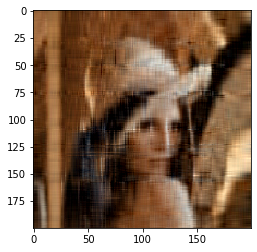

In [8]:
# Reconstruct the image using the trained model

prediction = model.predict()
plt.imshow(prediction.astype(int))

In [9]:
# Compute the RSE of our prediction

error = RSE(img, prediction)
print("RSE:", error)

RSE: 1.6736663402704106


In [14]:
# Create and train the model using ncg

model = TT_WOPT_Model(img_missing, (1, 24, 24, 1), lr=None, optimization="ncg")
model.train(5000)
print("normalized loss: ", model.train_logs)

         Current function value: 2174664.249107
         Iterations: 5000
         Function evaluations: 8743
         Gradient evaluations: 8743
normalized loss:  36.24440415178041


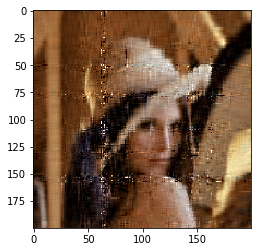

In [18]:
# Reconstruct the image using the trained model

prediction = model.predict()
prediction = np.clip(prediction, 0, 255)
plt.imshow(prediction.astype(int))

In [17]:
# Compute the RSE of our prediction

error = RSE(img, prediction)
print("RSE:", error)

RSE: 1.8432996990403487
